# ATIVIDADE 4.1 - Método da Bisseção

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Funções Principais (metodo_bissecao e metodo_falsa_posicao):

- Ambas recebem a função matemática f, o intervalo [a, b] (ou xl, xu) e critérios de parada (tol, max_iter).

- Bisseção: Calcula a nova estimativa como a média aritmética simples ((a+b)/2).

- Falsa Posição: Calcula a nova estimativa ponderada pelos valores da função (Fórmula x_atual na linha 76).

- Elas retornam um dicionário de histórico para facilitar a análise de erro pedida na questão 2.

QUESTÃO 1 e 5: Implementação dos Métodos Numéricos

Implementa o método da Bisseção (Algoritmo 1.1 do texto).
Retorna a raiz aproximada e o histórico de iterações.


    def metodo_bissecao(f, a, b, tol=1e-6, max_iter=100, verbose=False):

Passo 2: Verificação de existência da raiz (Teorema do Valor Intermediário) 

        if np.sign(f(a)) * np.sign(f(b)) != -1:
            if verbose: print("Erro: f(a) e f(b) devem ter sinais opostos.")
            return None, []

        historico = []
        x_old = a
        
Otimização: Calcular f(a) antes do loop para economizar processamento

        fa = f(a)
        
        print(f"\n--- Iniciando Bisseção no intervalo [{a}, {b}] ---")
        
Passo 3: Calcular ponto médio

Usando a forma otimizada para evitar overflow em números grandes [cite: 313]

        for i in range(max_iter):

            x_atual = a + 0.5 * (b - a)
            fx = f(x_atual)
            
Cálculo do erro relativo aproximado (se não for a primeira iteração)

            erro_rel = 0
            if i > 0:
                erro_rel = abs((x_atual - x_old) / x_atual)
            
            historico.append({'iter': i+1, 'x': x_atual, 'erro_rel': erro_rel, 'f(x)': fx})
            
            if verbose:
                print(f"Iter {i+1}: x = {x_atual:.6f}, f(x) = {fx:.6f}, Erro Rel = {erro_rel:.2%}")

Passo 4: Verificar se encontrou a raiz exata ou atingiu a tolerância

            if fx == 0 or (i > 0 and erro_rel < tol):
                return x_atual, historico
            
Passo 5: Atualizar subintervalos 

Otimização: Reutiliza o valor de fa calculado 

            if np.sign(fa) * np.sign(fx) == -1:
                b = x_atual

f(b) mudou, mas f(a) continua o mesmo, não precisa atualizar fa

            else:
                a = x_atual

Atualiza f(a) pois 'a' mudou para 'x_atual'

                fa = fx 
                
            x_old = x_atual
                
        return x_atual, historico

Implementa o método da Falsa Posição (Regula Falsi)

    def metodo_falsa_posicao(f, xl, xu, tol=1e-6, max_iter=100):

        if np.sign(f(xl)) * np.sign(f(xu)) != -1:
            print("Erro: f(xl) e f(xu) devem ter sinais opostos.")
            return None, []

        historico = []
        x_old = xl
        
Otimização: pré-calcular f(xl) e f(xu)

        fl = f(xl)
        fu = f(xu)
        
        for i in range(max_iter):

Fórmula da Falsa Posição 

x* = xu - (f(xu)*(xl - xu)) / (f(xl) - f(xu))

            x_atual = xu - (fu * (xl - xu)) / (fl - fu)
            fx = f(x_atual)
            
            erro_rel = 0
            if i > 0:
                erro_rel = abs((x_atual - x_old) / x_atual)
                
            historico.append({'iter': i+1, 'x': x_atual, 'erro_rel': erro_rel})
            
            if fx == 0 or (i > 0 and erro_rel < tol):
                return x_atual, historico
                
Teste para atualização de intervalo (lógica similar à bisseção)

            if np.sign(fl) * np.sign(fx) == -1:
                xu = x_atual
                fu = fx
            else:
                xl = x_atual
                fl = fx
                
            x_old = x_atual

        return x_atual, historico

In [4]:
def metodo_bissecao(f, a, b, tol=1e-6, max_iter=100, verbose=False):
    
    if np.sign(f(a)) * np.sign(f(b)) != -1:
        if verbose: print("Erro: f(a) e f(b) devem ter sinais opostos.")
        return None, []
    
    historico = []
    x_old = a
    
    fa = f(a)
    
    print(f"\n--- Iniciando Bisseção no intervalo [{a}, {b}] ---")
    
    for i in range(max_iter):
        
        x_atual = a + 0.5 * (b - a)
        fx = f(x_atual)
        
        erro_rel = 0
        if i > 0:
            erro_rel = abs((x_atual - x_old) / x_atual)
        
        historico.append({'iter': i+1, 'x': x_atual, 'erro_rel': erro_rel, 'f(x)': fx})
        
        if verbose:
            print(f"Iter {i+1}: x = {x_atual:.6f}, f(x) = {fx:.6f}, Erro Rel = {erro_rel:.2%}")

        if fx == 0 or (i > 0 and erro_rel < tol):
            return x_atual, historico
        
        if np.sign(fa) * np.sign(fx) == -1:
            b = x_atual
            
        else:
            a = x_atual
            fa = fx 
            
        x_old = x_atual
            
    return x_atual, historico

def metodo_falsa_posicao(f, xl, xu, tol=1e-6, max_iter=100):
    
    if np.sign(f(xl)) * np.sign(f(xu)) != -1:
        print("Erro: f(xl) e f(xu) devem ter sinais opostos.")
        return None, []

    historico = []
    x_old = xl
    
    fl = f(xl)
    fu = f(xu)
    
    for i in range(max_iter):
        
        x_atual = xu - (fu * (xl - xu)) / (fl - fu)
        fx = f(x_atual)
        
        erro_rel = 0
        if i > 0:
            erro_rel = abs((x_atual - x_old) / x_atual)
            
        historico.append({'iter': i+1, 'x': x_atual, 'erro_rel': erro_rel})
        
        if fx == 0 or (i > 0 and erro_rel < tol):
            return x_atual, historico
            
        if np.sign(fl) * np.sign(fx) == -1:
            xu = x_atual
            fu = fx
        else:
            xl = x_atual
            fl = fx
            
        x_old = x_atual

    return x_atual, historico

### *Questão 2:* Usa numpy.sqrt para a fórmula de Bhaskara. Executa a função de bisseção com max_iter=3 e imprime uma tabela comparando o erro relativo (entre passos) e o erro verdadeiro (comparado com Bhaskara).

f(x) = -0.5x^2 + 2.5x + 4.5

    print("\n" + "="*40)
    print("QUESTÃO 2")
    print("="*40)

    def f2(x): return -0.5 * x**2 + 2.5 * x + 4.5

(a) Graficamente

    x_vals = np.linspace(-5, 10, 100)
    y_vals = f2(x_vals)

    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, y_vals, label='f(x) = -0.5x² + 2.5x + 4.5')

Eixo X

    plt.axhline(0, color='black', linewidth=1) 
    
Eixo Y

    plt.axvline(0, color='black', linewidth=1) 
    plt.grid(True)
    plt.title('Questão 2a: Análise Gráfica')
    plt.legend()

O gráfico será exibido ao final se estiver em um ambiente interativo, ou salvo.

plt.show() 

(b) Fórmula Quadrática (Bhaskara)

ax^2 + bx + c = 0 -> a=-0.5, b=2.5, c=4.5

    delta = (2.5**2) - 4*(-0.5)*(4.5)
    raiz_verdadeira_1 = (-2.5 + np.sqrt(delta)) / (2*(-0.5))
    raiz_verdadeira_2 = (-2.5 - np.sqrt(delta)) / (2*(-0.5))
    print(f"(b) Raízes verdadeiras (Bhaskara): x1 = {raiz_verdadeira_1}, x2 = {raiz_verdadeira_2}")
    raiz_maior_verdadeira = max(raiz_verdadeira_1, raiz_verdadeira_2)

(c) 3 Iterações da Bisseção no intervalo [5, 10]

    raiz_aprox, hist_q2 = metodo_bissecao(f2, 5, 10, max_iter=3, verbose=True)

    print("\n(c) Análise de Erros (3 iterações):")
    print(f"{'Iter':<5} | {'x_aprox':<10} | {'Erro Rel (%)':<15} | {'Erro Verdadeiro':<15}")
    for h in hist_q2:
        erro_verdadeiro = abs(raiz_maior_verdadeira - h['x'])
        print(f"{h['iter']:<5} | {h['x']:<10.6f} | {h['erro_rel']*100:<15.4f} | {erro_verdadeiro:<15.6f}")


QUESTÃO 2
(b) Raízes verdadeiras (Bhaskara): x1 = -1.405124837953327, x2 = 6.405124837953327

--- Iniciando Bisseção no intervalo [5, 10] ---
Iter 1: x = 7.500000, f(x) = -4.875000, Erro Rel = 0.00%
Iter 2: x = 6.250000, f(x) = 0.593750, Erro Rel = 20.00%
Iter 3: x = 6.875000, f(x) = -1.945312, Erro Rel = 9.09%

(c) Análise de Erros (3 iterações):
Iter  | x_aprox    | Erro Rel (%)    | Erro Verdadeiro
1     | 7.500000   | 0.0000          | 1.094875       
2     | 6.250000   | 20.0000         | 0.155125       
3     | 6.875000   | 9.0909          | 0.469875       


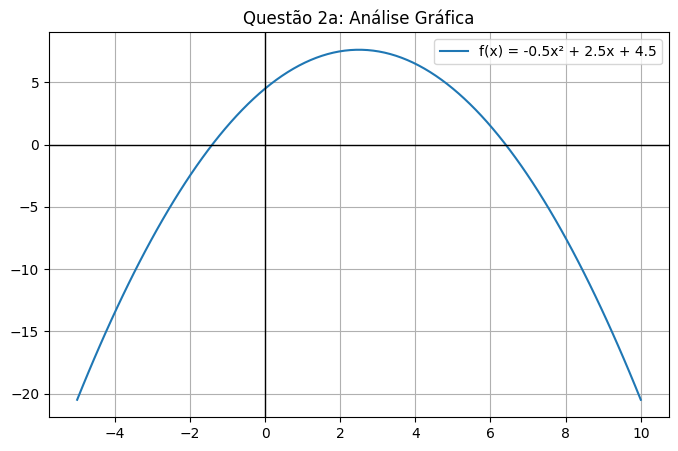

In [5]:
print("\n" + "="*40)
print("QUESTÃO 2")
print("="*40)

def f2(x): return -0.5 * x**2 + 2.5 * x + 4.5

x_vals = np.linspace(-5, 10, 100)
y_vals = f2(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='f(x) = -0.5x² + 2.5x + 4.5')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1) 
plt.grid(True)
plt.title('Questão 2a: Análise Gráfica')
plt.legend()

delta = (2.5**2) - 4*(-0.5)*(4.5)
raiz_verdadeira_1 = (-2.5 + np.sqrt(delta)) / (2*(-0.5))
raiz_verdadeira_2 = (-2.5 - np.sqrt(delta)) / (2*(-0.5))
print(f"(b) Raízes verdadeiras (Bhaskara): x1 = {raiz_verdadeira_1}, x2 = {raiz_verdadeira_2}")
raiz_maior_verdadeira = max(raiz_verdadeira_1, raiz_verdadeira_2)

raiz_aprox, hist_q2 = metodo_bissecao(f2, 5, 10, max_iter=3, verbose=True)

print("\n(c) Análise de Erros (3 iterações):")
print(f"{'Iter':<5} | {'x_aprox':<10} | {'Erro Rel (%)':<15} | {'Erro Verdadeiro':<15}")
for h in hist_q2:
    erro_verdadeiro = abs(raiz_maior_verdadeira - h['x'])
    print(f"{h['iter']:<5} | {h['x']:<10.6f} | {h['erro_rel']*100:<15.4f} | {erro_verdadeiro:<15.6f}")

### *Questão 3:* Define a função $h(x) = \sin(x) - x^3$, np.sin trabalha em radianos por padrão.

sin(x) = x^3

    print("\n" + "="*40)
    print("QUESTÃO 3")
    print("="*40)

Função h(x) = sin(x) - x^3

    def f3(x): return np.sin(x) - x**3

Intervalo [0.5, 1] e Erro < 2% (0.02)

    raiz_q3, hist_q3 = metodo_bissecao(f3, 0.5, 1.0, tol=0.02, verbose=False)
    print(f"Raiz encontrada para sin(x) = x³: {raiz_q3:.6f}")
    print(f"Número de iterações: {len(hist_q3)}")
    print(f"Erro relativo final: {hist_q3[-1]['erro_rel']*100:.4f}% (< 2%)")

In [6]:
print("\n" + "="*40)
print("QUESTÃO 3")
print("="*40)

def f3(x): return np.sin(x) - x**3

raiz_q3, hist_q3 = metodo_bissecao(f3, 0.5, 1.0, tol=0.02, verbose=False)
print(f"Raiz encontrada para sin(x) = x³: {raiz_q3:.6f}")
print(f"Número de iterações: {len(hist_q3)}")
print(f"Erro relativo final: {hist_q3[-1]['erro_rel']*100:.4f}% (< 2%)")


QUESTÃO 3

--- Iniciando Bisseção no intervalo [0.5, 1.0] ---
Raiz encontrada para sin(x) = x³: 0.921875
Número de iterações: 5
Erro relativo final: 1.6949% (< 2%)


### *Questão 4:* A função df4 representa a derivada da função original. Encontrar onde a derivada é zero ($f'(x)=0$) nos dá o ponto de máximo.


Máximo de f(x) = -2x^6 - 1.5x^4 + 10x + 20

    print("\n" + "="*40)
    print("QUESTÃO 4")
    print("="*40)

Para achar o máximo, achamos a raiz da derivada f'(x) 

f'(x) = -12x^5 - 6x^3 + 10

    def df4(x): return -12 * x**5 - 6 * x**3 + 10

Intervalo [0, 1], Erro limite 5% 

    raiz_max_q4, hist_q4 = metodo_bissecao(df4, 0, 1, tol=0.05, verbose=False)
    print(f"O valor de x que maximiza a função é: {raiz_max_q4:.6f}")
    print(f"Erro relativo final: {hist_q4[-1]['erro_rel']*100:.4f}% (< 5%)")


In [7]:
print("\n" + "="*40)
print("QUESTÃO 4")
print("="*40)

def df4(x): return -12 * x**5 - 6 * x**3 + 10

raiz_max_q4, hist_q4 = metodo_bissecao(df4, 0, 1, tol=0.05, verbose=False)
print(f"O valor de x que maximiza a função é: {raiz_max_q4:.6f}")
print(f"Erro relativo final: {hist_q4[-1]['erro_rel']*100:.4f}% (< 5%)")



QUESTÃO 4

--- Iniciando Bisseção no intervalo [0, 1] ---
O valor de x que maximiza a função é: 0.843750
Erro relativo final: 3.7037% (< 5%)


### *Questão 5:* Executa ambos os algoritmos com uma tolerância fina ($0.1\%$) para demonstrar que a Falsa Posição atinge o resultado com menos iterações.

Comparação Bisseção vs Falsa Posição

    print("\n" + "="*40)
    print("QUESTÃO 5: Comparação de Eficiência")
    print("="*40)

Usaremos a função do exemplo 4 para comparar

    print("Função teste: Derivada da Q4 (raiz em [0, 1])")
    print("Tolerância: 0.1% (mais rigorosa para ver a diferença)")

Executando Bisseção

    r_bis, h_bis = metodo_bissecao(df4, 0, 1, tol=0.001)

Executando Falsa Posição

    r_fp, h_fp = metodo_falsa_posicao(df4, 0, 1, tol=0.001)

    print(f"\nResultados:")
    print(f"Bisseção      -> Raiz: {r_bis:.6f} | Iterações: {len(h_bis)}")
    print(f"Falsa Posição -> Raiz: {r_fp:.6f} | Iterações: {len(h_fp)}")
    print("\nConclusão: A Falsa Posição geralmente converge com menos iterações \npois considera a magnitude de f(x) para traçar a reta.")

In [8]:
print("\n" + "="*40)
print("QUESTÃO 5: Comparação de Eficiência")
print("="*40)

print("Função teste: Derivada da Q4 (raiz em [0, 1])")
print("Tolerância: 0.1% (mais rigorosa para ver a diferença)")

r_bis, h_bis = metodo_bissecao(df4, 0, 1, tol=0.001)

r_fp, h_fp = metodo_falsa_posicao(df4, 0, 1, tol=0.001)

print(f"\nResultados:")
print(f"Bisseção      -> Raiz: {r_bis:.6f} | Iterações: {len(h_bis)}")
print(f"Falsa Posição -> Raiz: {r_fp:.6f} | Iterações: {len(h_fp)}")
print("\nConclusão: A Falsa Posição geralmente converge com menos iterações \npois considera a magnitude de f(x) para traçar a reta.")


QUESTÃO 5: Comparação de Eficiência
Função teste: Derivada da Q4 (raiz em [0, 1])
Tolerância: 0.1% (mais rigorosa para ver a diferença)

--- Iniciando Bisseção no intervalo [0, 1] ---

Resultados:
Bisseção      -> Raiz: 0.871582 | Iterações: 11
Falsa Posição -> Raiz: 0.871165 | Iterações: 6

Conclusão: A Falsa Posição geralmente converge com menos iterações 
pois considera a magnitude de f(x) para traçar a reta.
